# Stock Price Prediction 

## Data collection

## Data cleaning

In [1]:
# Loading libraries 

import pandas as pd
import numpy as np

### Loading the dataset

In [2]:
df = pd.read_csv('../data/Stock-price-data-train-2010-2022.csv')

df.head()

,Date,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume,MSFT_Open,MSFT_High,MSFT_Low,...,GOOGL_Low,GOOGL_Close,GOOGL_Adj Close,GOOGL_Volume,AMZN_Open,AMZN_High,AMZN_Low,AMZN_Close,AMZN_Adj Close,AMZN_Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470740,493729600,30.620001,31.100000,30.590000,...,15.621622,15.684434,15.666453,78169752,6.8125,6.8305,6.6570,6.6950,6.6950,151998000
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800,30.850000,31.100000,30.639999,...,15.554054,15.615365,15.597464,120067812,6.6715,6.7740,6.5905,6.7345,6.7345,177038000
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378825,552160000,30.879999,31.080000,30.520000,...,15.174174,15.221722,15.204272,158988852,6.7300,6.7365,6.5825,6.6125,6.6125,143576000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200,30.629999,30.700001,30.190001,...,14.831081,14.867367,14.850323,256315428,6.6005,6.6160,6.4400,6.5000,6.5000,220604000
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409363,447610800,30.280001,30.879999,30.240000,...,14.742492,15.065566,15.048295,188783028,6.5280,6.6840,6.4515,6.6760,6.6760,196610000


In [3]:
df.shape

(3272, 25)

The data has 3272 records and 25 features/columns

### Checking for missing data and duplicates

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Date               0
AAPL_Open          0
AAPL_High          0
AAPL_Low           0
AAPL_Close         0
AAPL_Adj Close     0
AAPL_Volume        0
MSFT_Open          0
MSFT_High          0
MSFT_Low           0
MSFT_Close         0
MSFT_Adj Close     0
MSFT_Volume        0
GOOGL_Open         0
GOOGL_High         0
GOOGL_Low          0
GOOGL_Close        0
GOOGL_Adj Close    0
GOOGL_Volume       0
AMZN_Open          0
AMZN_High          0
AMZN_Low           0
AMZN_Close         0
AMZN_Adj Close     0
AMZN_Volume        0
dtype: int64

There are no nulls or duplicates in the dataset


In [6]:
df.dtypes

Date                object
AAPL_Open          float64
AAPL_High          float64
AAPL_Low           float64
AAPL_Close         float64
AAPL_Adj Close     float64
AAPL_Volume          int64
MSFT_Open          float64
MSFT_High          float64
MSFT_Low           float64
MSFT_Close         float64
MSFT_Adj Close     float64
MSFT_Volume          int64
GOOGL_Open         float64
GOOGL_High         float64
GOOGL_Low          float64
GOOGL_Close        float64
GOOGL_Adj Close    float64
GOOGL_Volume         int64
AMZN_Open          float64
AMZN_High          float64
AMZN_Low           float64
AMZN_Close         float64
AMZN_Adj Close     float64
AMZN_Volume          int64
dtype: object

### Date datatype conversion

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

#setting Date as the index
df.set_index('Date', inplace=True)

df.head()

,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume,MSFT_Open,MSFT_High,MSFT_Low,MSFT_Close,...,GOOGL_Low,GOOGL_Close,GOOGL_Adj Close,GOOGL_Volume,AMZN_Open,AMZN_High,AMZN_Low,AMZN_Close,AMZN_Adj Close,AMZN_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470740,493729600,30.620001,31.100000,30.590000,30.950001,...,15.621622,15.684434,15.666453,78169752,6.8125,6.8305,6.6570,6.6950,6.6950,151998000
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800,30.850000,31.100000,30.639999,30.959999,...,15.554054,15.615365,15.597464,120067812,6.6715,6.7740,6.5905,6.7345,6.7345,177038000
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378825,552160000,30.879999,31.080000,30.520000,30.770000,...,15.174174,15.221722,15.204272,158988852,6.7300,6.7365,6.5825,6.6125,6.6125,143576000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200,30.629999,30.700001,30.190001,30.450001,...,14.831081,14.867367,14.850323,256315428,6.6005,6.6160,6.4400,6.5000,6.5000,220604000
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409363,447610800,30.280001,30.879999,30.240000,30.660000,...,14.742492,15.065566,15.048295,188783028,6.5280,6.6840,6.4515,6.6760,6.6760,196610000


### Sorting the data

In [8]:
df.sort_index(inplace=True)
df.head()

,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume,MSFT_Open,MSFT_High,MSFT_Low,MSFT_Close,...,GOOGL_Low,GOOGL_Close,GOOGL_Adj Close,GOOGL_Volume,AMZN_Open,AMZN_High,AMZN_Low,AMZN_Close,AMZN_Adj Close,AMZN_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470740,493729600,30.620001,31.100000,30.590000,30.950001,...,15.621622,15.684434,15.666453,78169752,6.8125,6.8305,6.6570,6.6950,6.6950,151998000
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800,30.850000,31.100000,30.639999,30.959999,...,15.554054,15.615365,15.597464,120067812,6.6715,6.7740,6.5905,6.7345,6.7345,177038000
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378825,552160000,30.879999,31.080000,30.520000,30.770000,...,15.174174,15.221722,15.204272,158988852,6.7300,6.7365,6.5825,6.6125,6.6125,143576000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200,30.629999,30.700001,30.190001,30.450001,...,14.831081,14.867367,14.850323,256315428,6.6005,6.6160,6.4400,6.5000,6.5000,220604000
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409363,447610800,30.280001,30.879999,30.240000,30.660000,...,14.742492,15.065566,15.048295,188783028,6.5280,6.6840,6.4515,6.6760,6.6760,196610000


## Data Visualization

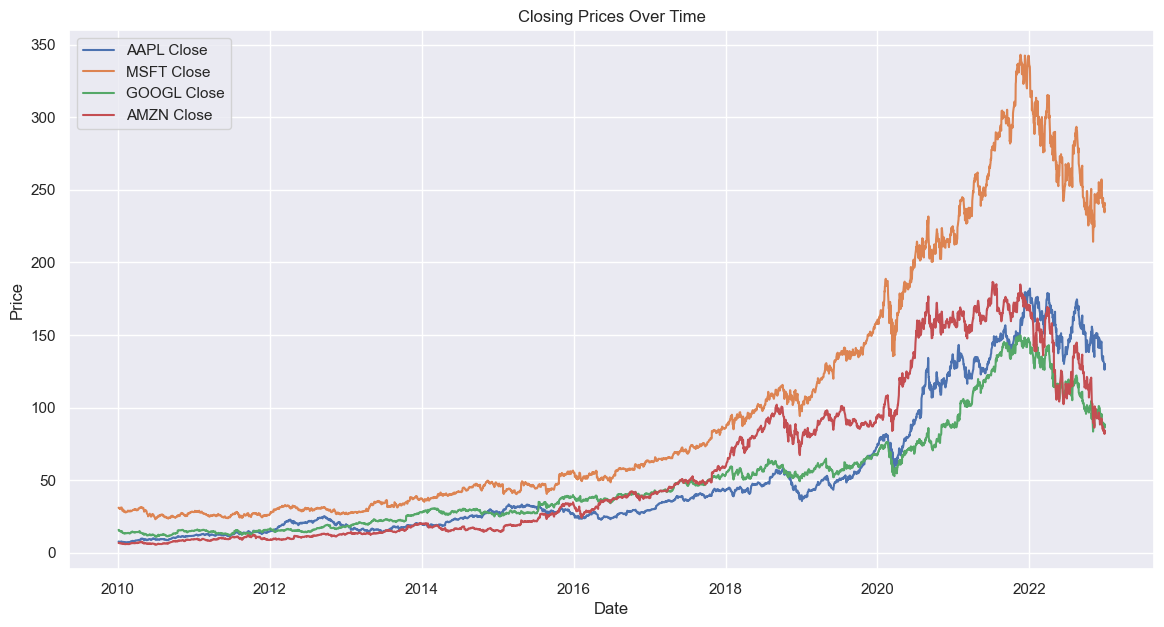

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(14, 7))

for ticker in ['AAPL', 'MSFT', 'GOOGL', 'AMZN']:
    plt.plot(df.index, df[f'{ticker}_Close'], label=f'{ticker} Close')

plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


**Insights**

* All stocks show an overall increasing trend over the years just before 2022, with varying degrees of volatility. AAPL (Apple) exhibits particularly sharp increase from 2020 to 2021, while GOOGL and MSFT show steadier growth. AMZN also displays strong growth but with noticeable fluctuations.

* In 2022, all prices of these tech giants fell which is as a result of higher interest rates, high inflation and uncertain economic conditions.

* According to Forbes, Tech stocks fell more than 30% in 2022, more than the overall market drop of 20%.


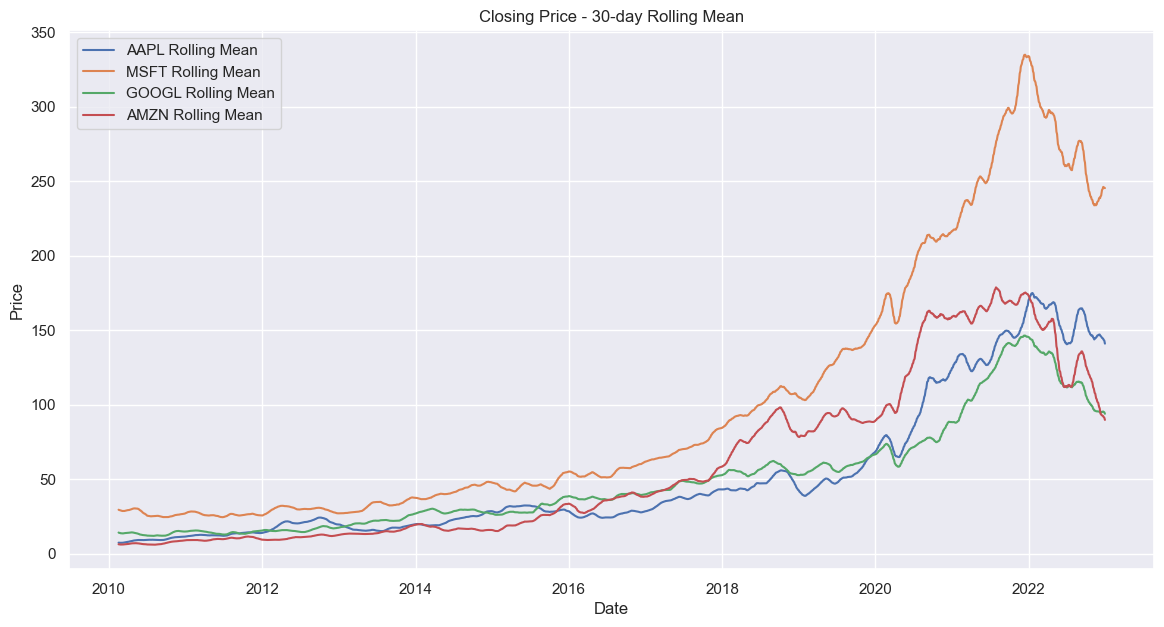

In [10]:
plt.figure(figsize=(14, 7))

for ticker in ['AAPL', 'MSFT', 'GOOGL', 'AMZN']:
    plt.plot(df.index, df[f'{ticker}_Close'].rolling(window=30).mean(), label=f'{ticker} Rolling Mean')


plt.title('Closing Price - 30-day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


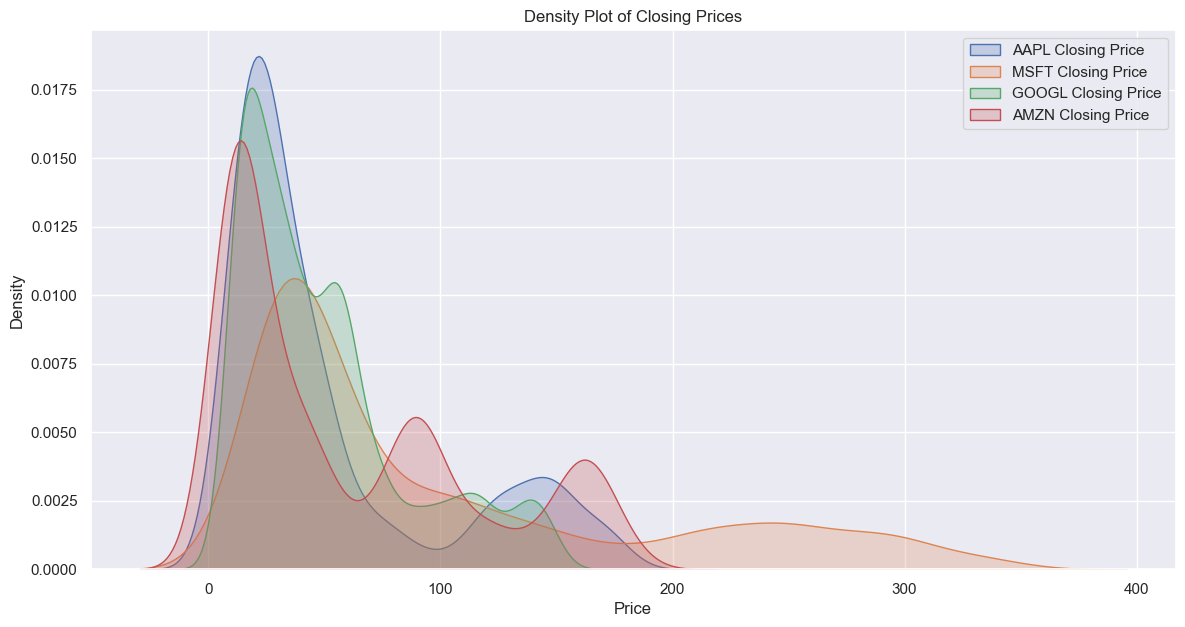

In [11]:
plt.figure(figsize=(14, 7))


for ticker in ['AAPL', 'MSFT', 'GOOGL', 'AMZN']:
    sns.kdeplot(df[f'{ticker}_Close'], label=f'{ticker} Closing Price', fill=True)

plt.title('Density Plot of Closing Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


* MSFT, Google (GOOGL) and Amazon (AMZN) have wider and more spread-out price distributions, suggesting higher volatility in their closing prices.
* There is significant overlap in the price ranges of AAPL, MSFT, AMZN and GOOGL around the $50 to $100 range, indicating similar densities at these price points.

In [12]:
df.describe()

,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume,MSFT_Open,MSFT_High,MSFT_Low,MSFT_Close,...,GOOGL_Low,GOOGL_Close,GOOGL_Adj Close,GOOGL_Volume,AMZN_Open,AMZN_High,AMZN_Low,AMZN_Close,AMZN_Adj Close,AMZN_Volume
count,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3.272000e+03,3272.000000,3272.000000,3272.000000,3272.000000,...,3272.000000,3272.000000,3272.000000,3.272000e+03,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3.272000e+03
mean,51.297746,51.869747,50.731996,51.321186,49.132052,2.562707e+08,100.090715,101.082078,99.050037,100.115355,...,48.653316,49.160898,49.104541,6.017541e+07,58.944595,59.618274,58.190704,58.912957,58.912957,8.833206e+07
std,47.328490,47.938843,46.732224,47.357062,47.497544,2.225648e+08,88.247581,89.200539,87.220896,88.254726,...,35.387644,35.804094,35.763049,4.957609e+07,54.131982,54.778610,53.404214,54.078546,54.078546,5.308631e+07
min,6.870357,7.000000,6.794643,6.858929,5.806767,3.519590e+07,23.090000,23.320000,22.730000,23.010000,...,10.851602,10.912663,10.900153,9.312000e+06,5.296500,5.564500,5.290000,5.430500,5.430500,1.762600e+07
25%,18.966697,19.121697,18.780179,18.967589,16.512827,1.023541e+08,31.807499,32.032500,31.592500,31.815000,...,20.172359,20.295858,20.272592,2.894200e+07,13.345375,13.474750,13.199250,13.327125,13.327125,5.611750e+07
50%,29.756250,29.981250,29.561250,29.815000,27.199443,1.666698e+08,55.680000,56.049999,55.160000,55.740000,...,38.224501,38.563002,38.518795,4.123200e+07,36.331001,36.537500,36.053751,36.393749,36.393749,7.457900e+07
75%,56.983748,57.309999,56.469999,56.777499,54.578362,3.456643e+08,139.607498,140.390003,138.002499,139.070000,...,61.218125,61.738001,61.667227,7.927251e+07,93.012501,94.165876,92.019377,93.131001,93.131001,1.037110e+08
max,182.630005,182.940002,179.119995,182.009995,179.724548,1.880998e+09,344.619995,349.670013,342.200012,343.109985,...,148.899002,149.838501,149.666733,5.923990e+08,187.199997,188.654007,184.839493,186.570496,186.570496,8.484220e+08


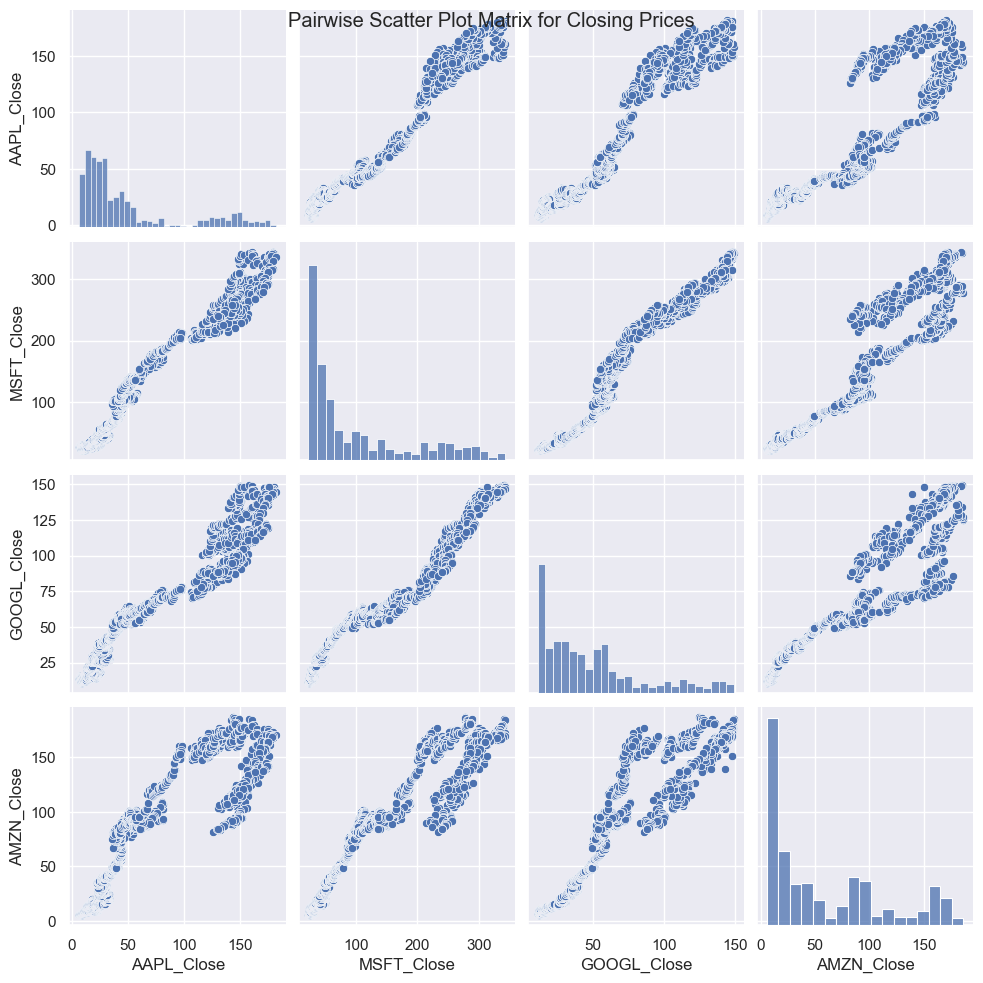

In [13]:
sns.pairplot(df[['AAPL_Close', 'MSFT_Close', 'GOOGL_Close', 'AMZN_Close']])
plt.suptitle('Pairwise Scatter Plot Matrix for Closing Prices')
plt.show()


Correlation Matrix:
             AAPL_Close  MSFT_Close  GOOGL_Close  AMZN_Close
AAPL_Close     1.000000    0.983997     0.964910    0.920145
MSFT_Close     0.983997    1.000000     0.980884    0.955911
GOOGL_Close    0.964910    0.980884     1.000000    0.943063
AMZN_Close     0.920145    0.955911     0.943063    1.000000


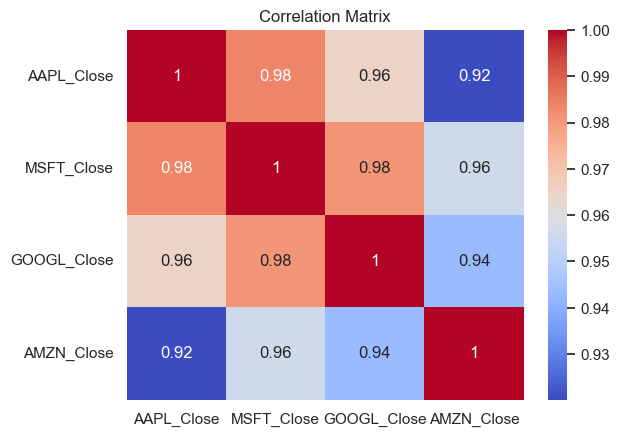

In [14]:

tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
closing_prices = df[[f'{ticker}_Close' for ticker in tickers]]

# Compute correlation matrix
correlation_matrix = closing_prices.corr()

print("Correlation Matrix:")
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**Insights:**

* The correlation matrix reveals strong positive correlations among the closing prices of major tech stocks such as Apple (AAPL), Microsoft (MSFT), Google (GOOGL), and Amazon (AMZN). 

* Specifically, AAPL shows significant correlation with MSFT, GOOGL, and AMZN, with coefficients ranging from approximately 0.920 to 0.984. This suggests that movements in AAPL's closing price tend to align closely with these other tech giants, indicating shared market influences and investor sentiment within the technology sector.

* These correlations imply that changes in market conditions or investor sentiment impacting one of these stocks are likely to influence others similarly. 

### Exporting preprocessed training data 

In [15]:
df.to_csv('../data/pre-processed-train-data.csv')